Author: Richard Kha

Email: kharichard@csu.fullerton.edu

CPSC 483 - 01

Project 3 - Scikit-learn and Polynomial Regression

In this project, we are using the scikit-learn library with numpy to compare the performances of linear and polynomial regression models. Using the boston.npz dataset, we are finding the coefficients, intercepts, and MSEs of the training and test sets for each model. Using the LSTAT and MEDV features, we compared scatterplots of a least squares fit line and a degree-2 polynomial least squares fit line. Comparing the MSEs of each model helps determine if the models are overfitting or underfitting our data.

Experiment Answers Section

The coefficient, intercept, and MSE values are outputted under the code cells.

3. The relationships does not appear to be linear.

4. f(x) = 34.9911 - 0.9809x

5. The model does not seem to fit very well, it seems like an underfit.

7. For the training set, our MSE is 38.4789 while we get 38.7505 for the testing set MSE. The MSE for the training set is lower.

8. Compared to the previous MSE values, the more felxible model has better MSE values of 30.5985 for the training set and 29.2971 for the test set. The error for the flexible model is less than the previous model.

10. Using all input features, the MSE of this model is less compared to the 2-polynomial feature model using LSTAT as it has a MSE of 21.0463 for the training set and 25.9764 for the test set. The difference in MSE may be because of having much more feature data used to to fit the model, giving us more prediction data to work with but potentially overfitting.

11. The MSE values of the 2-degree polynomial model using all input features is lower compared to the previous model of using all input features as the training set MSE is 13.5081 and the test set MSE is 17.8579. 

12. Compared to the previous model, the MSE of the fit transformed degree-2 polynomial has a lower training set MSE of 10.8302 but a higher test set MSE of 20.4675. When adding interaction terms, the MSE of the test set increases by about 0.5 while the test set MSE increases by about 10. In both cases, the MSE increases by adding interaction terms. We may be overfitting as there are 105 coefficients for the model, meaning there are a lot of bends.

In [57]:
#Problem 1, 2
#Load the dataset and split feature and target values into training and test sets.

import numpy as np
from sklearn.model_selection import train_test_split

#Load the data, separated by feature and target values
data = np.load('boston.npz')
features = data['features']
target = data['target'][:,None]

#Split the data into training and test sets with 80% going to the training set and 20% of the data to the test set.
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 2021-3-11)

data.close()

In [58]:
#Problem 3, 4, 6, 7, 8, 9
#Find coefficients and intercept for both 1 and 2-degree linear models to fit for scatterplot.
#Find average loss for training and test sets for both models.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Set X and y variables to LSTAT and MEDV values for training and test sets
X = feature_train[:,12][:,None]
X1 = feature_test[:,12][:,None]
y = target_train
y1 = target_test

#Make a linear model of X and y
reg = LinearRegression().fit(X,y)

#Find coefficient and intercept of the model
coeff = reg.coef_
intercept = reg.intercept_

#Formatting and output
print ('This is the coefficient and intercept with LSTAT as X and MEDV as y.')
print (coeff, intercept)
print ('------------------------------------')

#Put intercept and coefficient into a np.array to print as line for scatterplot
temp = [intercept, coeff]
w = np.array(temp, dtype = object)
#print (w)

#Create predictions and find MSE for training set of first model
lstat_train_predict = reg.predict(X)
avg_train_loss = mean_squared_error(y, lstat_train_predict)

#Output MSE and formatting
print ('This is the average loss of the training set for LSTAT attribute.')
print (avg_train_loss)
print ('------------------------------------')

#Create predictions for test set and find MSE
lstat_test_predict = reg.predict(X1)
#print (lstat_test_predict)
avg_test_loss = mean_squared_error(y1, lstat_test_predict)

#Output MSE and formatting
print ('This is the average loss of the test set for LSTAT attribute.')
print (avg_test_loss)
print ('------------------------------------')

#Create a degree-2 polynomial feature of X and fit a new model
fit_model = np.hstack((X, X**2))
fit_reg = LinearRegression().fit(fit_model,y)

#Create training set predictions of new model and find MSE
fit_train_predict = fit_reg.predict(fit_model)
avg_fittrain_loss = mean_squared_error(y, fit_train_predict)

#Output MSE and formatting
print ('This is the average loss of the polynomial feature training set for LSTAT attribute.')
print (avg_fittrain_loss)
print ('------------------------------------')

#Create test set predictions of new model and find MSE
test_stack = np.hstack((X1, X1**2 ))
fit_test_predict = fit_reg.predict(test_stack)
avg_fittest_loss = mean_squared_error(y1, fit_test_predict)

#Output MSE and formatting
print ('This is the average loss of the polynomial feature test set for LSTAT attribute.')
print (avg_fittest_loss)

#Find coefficient and intercept of the polynomial model
poly_coeff = fit_reg.coef_
poly_intercept = fit_reg.intercept_

#Shape it so it fits in a np.array
poly_coeff.shape = (2,1)

#Put intercept and coefficient into a np.array to print as line for scatterplot
w1 = np.append(poly_intercept, poly_coeff)
#print (w1)

This is the coefficient and intercept with LSTAT as X and MEDV as y.
[[-0.98093888]] [34.99113302]
------------------------------------
This is the average loss of the training set for LSTAT attribute.
38.47893344802523
------------------------------------
This is the average loss of the test set for LSTAT attribute.
38.75054664279498
------------------------------------
This is the average loss of the polynomial feature training set for LSTAT attribute.
30.59851434937097
------------------------------------
This is the average loss of the polynomial feature test set for LSTAT attribute.
29.297124138279116


Text(0, 0.5, 'Median Value in 1000s')

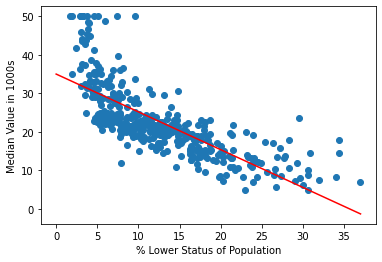

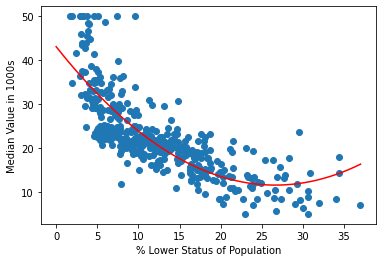

In [59]:
#Problem 3, 5, 9
#Create a scatter plot with the relationship between LSTAT and MEDV and fit a line with the 
#degree-1 model and degree-2 polynomial model.

import matplotlib.pyplot as plt

data_x = []
data_y = []

#Put LSTAT and MEDV values into a list for the scatterplot
for i in range(0, len(feature_train)):
    x = feature_train[i][12]
    y = target_train[i]
    data_x.append(x)
    data_y.append(y)
    
#Create the least squares fit line for the graph
testx = np.linspace(0, 37, 50)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,w) 

#Create the 2-degree polynomial least squares fit line for the graph
testX1 = np.hstack((np.ones_like(testx),testx,testx**2))
testt1 = np.dot(testX1,w1)

#Create scatter plot and labels for the first model
plt.figure()
plt.scatter(data_x,data_y)
plt.plot(testx,testt, 'r')
plt.xlabel('% Lower Status of Population')
plt.ylabel('Median Value in 1000s')

#Create scatter plot and labels for the 2-degree polynomial model
plt.figure()
plt.scatter(data_x,data_y)
plt.plot(testx,testt1,'r')
plt.xlabel('% Lower Status of Population')
plt.ylabel('Median Value in 1000s')


In [60]:
#Problem 10
#Use all input features as X and find training/test MSEs for this model.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Set X and y variables to feature inputs and MEDV values for training and test sets
X = feature_train
X1 = feature_test
y = target_train
y1 = target_test

#Make a linear model of X and y
reg = LinearRegression().fit(X,y)

#Find coefficients and intercept of the model
coeff = reg.coef_
intercept = reg.intercept_

#Formatting and output
print ('These are the coefficients and intercept with all input features as X and MEDV as y.')
print (coeff, intercept)
print ('------------------------------------')

#Create predictions and find MSE for training set of first model
training_predict = reg.predict(X)
avg_train_loss = mean_squared_error(y, training_predict)

#Output MSE and formatting
print ('This is the average loss of the training set for the input features.')
print (avg_train_loss)
print ('------------------------------------')

#Create predictions for test set and find MSE of it
test_predict = reg.predict(X1)
avg_test_loss = mean_squared_error(y1, test_predict)

#Output MSE and formatting
print ('This is the average loss of the test set for the input features.')
print (avg_test_loss)

These are the coefficients and intercept with all input features as X and MEDV as y.
[[-1.19721961e-01  5.29635924e-02  5.16150347e-02  2.55847703e+00
  -1.72524020e+01  4.08697043e+00 -4.64415129e-03 -1.52421308e+00
   2.99638323e-01 -1.37152390e-02 -8.48912621e-01  6.56971068e-03
  -5.33276034e-01]] [34.33727849]
------------------------------------
This is the average loss of the training set for the input features.
21.046340805342368
------------------------------------
This is the average loss of the test set for the input features.
25.976408935996655


In [61]:
#Problem 11
#Use all input features as X and make X fit to a degree-2 polynomial model. Find MSEs for training and test set.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Set X and y variables to feature inputs and MEDV values for training and test sets
X = feature_train
X1 = feature_test
y = target_train
y1 = target_test

#Create a degree-2 polynomial feature of X and fit a new model
fit_model = np.hstack((X, X**2))
reg = LinearRegression().fit(fit_model,y)

#Find coefficients and intercept of the model
coeff = reg.coef_
intercept = reg.intercept_

#Formatting and output
print ('These are the coefficients and intercept with all input features as X with the model as a 2-degree polynomial.')
print (coeff, intercept)
print ('------------------------------------')

#Create predictions and find MSE for training set
training_predict = reg.predict(fit_model)
avg_train_loss = mean_squared_error(y, training_predict)

#Output MSE and formatting
print ('This is the average loss of the 2-degree polynomial training set for the input features.')
print (avg_train_loss)
print ('------------------------------------')

#Make the stack for the test set
test_fit_model = np.hstack((X1, X1**2))

#Create predictions for test set and find MSE of it
test_predict = reg.predict(test_fit_model)
avg_test_loss = mean_squared_error(y1, test_predict)

#Output MSE and formatting
print ('This is the average loss of the 2-degree polynomial test set for the input features.')
print (avg_test_loss)

These are the coefficients and intercept with all input features as X with the model as a 2-degree polynomial.
[[-3.92085503e-01 -7.19011888e-02 -1.97705833e-01  1.10722200e+00
  -2.85510938e+01 -1.99438507e+01 -2.06999941e-02 -2.38307906e+00
   7.13464673e-01 -2.22236081e-02 -4.92472817e+00  1.37417418e-02
  -1.35387003e+00  3.18945894e-03  1.00563524e-03  9.53182992e-03
   1.10722199e+00  3.80657209e+00  1.78000309e+00  1.73534050e-04
   1.08536470e-01 -1.07653661e-02  8.89382723e-06  1.18391848e-01
  -1.90605567e-05  2.37862684e-02]] [162.52156309]
------------------------------------
This is the average loss of the 2-degree polynomial training set for the input features.
13.508100802461714
------------------------------------
This is the average loss of the 2-degree polynomial test set for the input features.
17.85789609301442


In [62]:
#Problem 12
#Use fit transform to create the degree-2 polynomial and fit to a new linear model. Find MSE of training and test sets

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

#Set X and y variables to feature inputs and MEDV values for training and test sets
X = feature_train
X1 = feature_test
y = target_train
y1 = target_test

#Create 2-degree polynomial and fit transform for training set
poly_train1 = PolynomialFeatures(2, interaction_only=False).fit_transform(X)
poly_train2 = PolynomialFeatures(2, interaction_only=True).fit_transform(X)

#Fit the polynomial to a new model
reg1 = LinearRegression().fit(poly_train1,y)
reg2 = LinearRegression().fit(poly_train2,y)

#Create predictions and find MSE for training set of first model
training_predict1 = reg1.predict(poly_train1)
training_predict2 = reg2.predict(poly_train2)
avg_train_loss1 = mean_squared_error(y, training_predict1)
avg_train_loss2 = mean_squared_error(y, training_predict2)


#Create 2-degree polynomial and fit transform for test set
poly_test1 = PolynomialFeatures(2, interaction_only=False).fit_transform(X1)
poly_test2 = PolynomialFeatures(2, interaction_only=True).fit_transform(X1)

#Create predictions for test set and find MSE of it
test_predict1 = reg1.predict(poly_test1)
test_predict2 = reg2.predict(poly_test2)
avg_test_loss1 = mean_squared_error(y1, test_predict1)
avg_test_loss2 = mean_squared_error(y1, test_predict2)

#Output MSE and formatting
print ('This is the average loss of the training set with no interaction terms.')
print (avg_train_loss1)
print ('------------------------------------')

print ('This is the average loss of the training set with interaction terms.')
print (avg_train_loss2)
print ('------------------------------------')


print ('This is the average loss of the test set with no interaction terms.')
print (avg_test_loss1)
print ('------------------------------------')

print ('This is the average loss of the test set with interaction terms.')
print (avg_test_loss2)

This is the average loss of the training set with no interaction terms.
10.830195645535373
------------------------------------
This is the average loss of the training set with interaction terms.
11.357290664416448
------------------------------------
This is the average loss of the test set with no interaction terms.
20.46747899190352
------------------------------------
This is the average loss of the test set with interaction terms.
30.06445082514424
